#  Optical Character Recognition(OCR) System

# Introduction
This project focuses on building an Optical Character Recognition (OCR) system using Convolutional Neural Networks (CNNs) and Transfer Learning. The goal is to develop a model that can accurately recognize and classify characters in images.

Here's a breakdown of the key components and steps involved:

Dataset: The project utilizes the "Standard OCR Dataset" which contains a variety of characters for training and testing the OCR model.

CNN Model: A custom CNN model is constructed using layers like Conv2D, MaxPooling2D, Flatten, and Dense. These layers work together to extract features from images and classify them into different characters.

Transfer Learning: To enhance the model's performance, transfer learning is employed using the pre-trained VGG16 model. By leveraging the knowledge learned from a large dataset (ImageNet), the OCR model can achieve better accuracy with less training data.

Evaluation: The performance of both the custom CNN model and the transfer learning model is evaluated using metrics like loss and accuracy. This helps in comparing the effectiveness of the two approaches.

Real-World Application: The project demonstrates a real-world application by using the trained OCR model to detect and recognize text in an image. It showcases the potential of the model to be used in various applications like document digitization and text extraction.

Downloading the dataset

In [ ]:
!kaggle datasets download -d preatcher/standard-ocr-dataset

Dataset URL: https://www.kaggle.com/datasets/preatcher/standard-ocr-dataset
License(s): CC0-1.0
 95% 44.0M/46.2M [00:03<00:00, 21.3MB/s]
100% 46.2M/46.2M [00:03<00:00, 13.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/standard-ocr-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

Importing Basic libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Rescaling
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
image_height, image_width = 150 , 150
batch_size = 32

### Generators
I am using Generators to load images in Batches of 32 images from training and testing directory rather than loading entire Dataset into memory at once.

In [ ]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/training_data',
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size = 32,
    image_size = (image_height, image_width)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/training_data',
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size = 32,
    image_size = (image_height, image_width)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/training_data',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (image_height, image_width)
)


Found 20628 files belonging to 36 classes.
Using 16503 files for training.
Found 20628 files belonging to 36 classes.
Using 4125 files for validation.
Found 20628 files belonging to 36 classes.


In [ ]:
class_names = train_ds.class_names

Visualizing one images from each directory

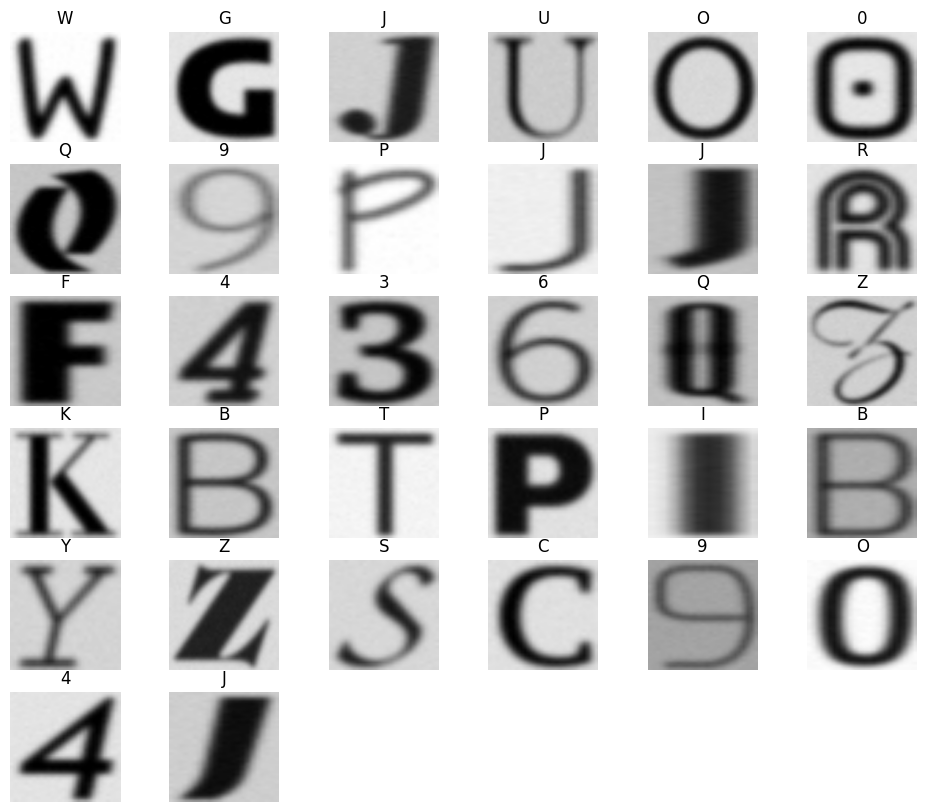

In [ ]:
#Visualize Image

plt.figure(figsize=(12,10))
for images, labels in train_ds.take(1):
  for i in range(min(len(images), len(class_names))):
    ax = plt.subplot(6,6 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
from tensorflow.keras.layers import BatchNormalization , Dropout , Input
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal

### Custom Model Building

In [ ]:
# Model Building

num_classes = len(class_names)

# CNN Model

model = Sequential()

model.add(Input(shape=(image_height,image_width,3)))
model.add(Rescaling(1./255))

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(256, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(len(class_names), activation = 'softmax'))



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           2,3

 Total params: 2,007,204 (7.66 MB)

 Trainable params: 2,005,988 (7.65 MB)

 Non-trainable params: 1,216 (4.75 KB)

### Custom Model Compilation

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Custom Model Training
I am saving the model training in a history variable to use it further in Visualization.

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.7539 - loss: 1.0486 - val_accuracy: 0.9047 - val_loss: 0.3442
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.9444 - loss: 0.1799 - val_accuracy: 0.9476 - val_loss: 0.1536
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9582 - loss: 0.1221 - val_accuracy: 0.9615 - val_loss: 0.1163
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9640 - loss: 0.1028 - val_accuracy: 0.9576 - val_loss: 0.1256
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9692 - loss: 0.0830 - val_accuracy: 0.9636 - val_loss: 0.1073
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9753 - loss: 0.0639 - val_accuracy: 0.9651 - val_loss: 0.1103
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9744 - loss: 0.0656 - val_accuracy: 0.9675 - val_loss: 0.1135
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9797 - loss: 0.0556 - 

### Custom Model Visualization

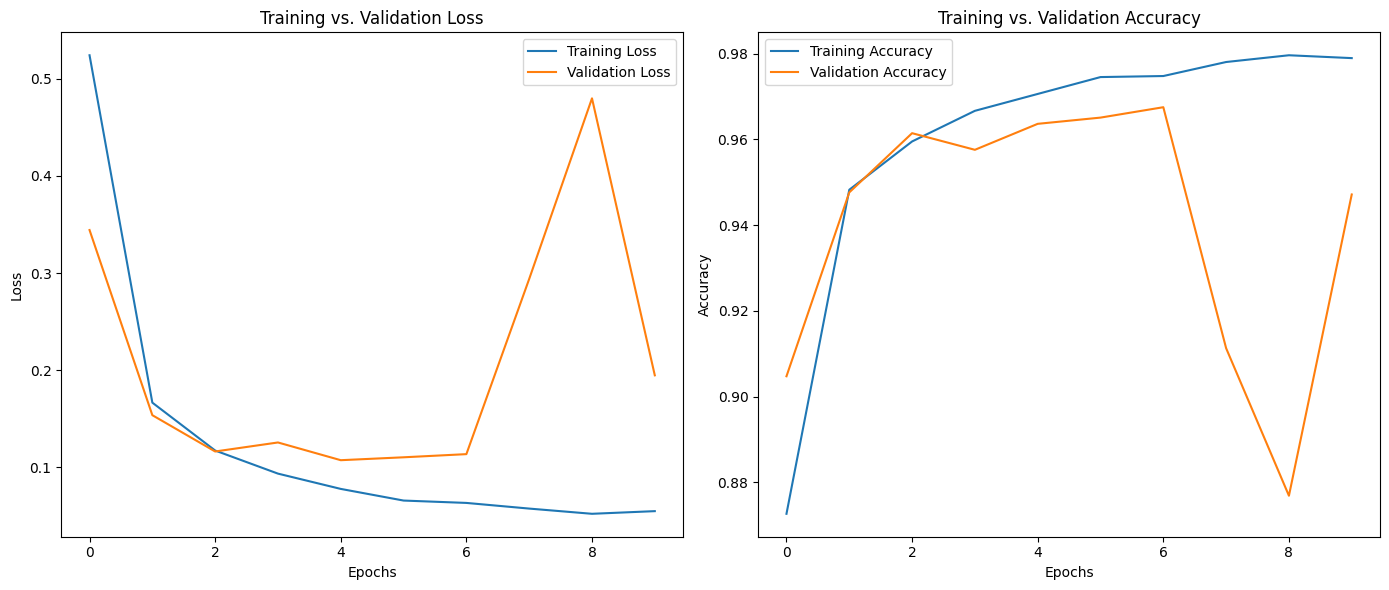

In [ ]:
# Extract loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Extract accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting the training loss vs. validation loss
plt.figure(figsize=(14, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# Transfer Learning(VGG16)

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(image_height,image_width,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Freezing the top 4 Convolution Layer

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


### Transfer Learning Model Architecture

In [ ]:
#Model Architecture

trans_model = Sequential()

trans_model.add(Input(shape=(image_height,image_width,3)))
trans_model.add(Rescaling(1./255))

trans_model.add(conv_base)

trans_model.add(Flatten())
trans_model.add(Dense(128, activation = 'relu'))
trans_model.add(BatchNormalization())
trans_model.add(Dropout(0.25))
trans_model.add(Dense(64, activation = 'relu'))
trans_model.add(Dense(len(class_names), activation = 'softmax'))


In [ ]:
trans_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,774,500 (60.17 MB)

 Trainable params: 8,138,980 (31.05 MB)

 Non-trainable params: 7,635,520 (29.13 MB)

In [ ]:
trans_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### VGG16 Model Training

In [ ]:
history1 = trans_model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 86s 139ms/step - accuracy: 0.7104 - loss: 1.3484 - val_accuracy: 0.8601 - val_loss: 0.4385
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 113s 105ms/step - accuracy: 0.9514 - loss: 0.1593 - val_accuracy: 0.9588 - val_loss: 0.1429
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 54s 104ms/step - accuracy: 0.9669 - loss: 0.1099 - val_accuracy: 0.9612 - val_loss: 0.1222
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.9694 - loss: 0.0960 - val_accuracy: 0.9632 - val_loss: 0.1194
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.9713 - loss: 0.0785 - val_accuracy: 0.9656 - val_loss: 0.1062
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 55s 107ms/step - accuracy: 0.9734 - loss: 0.0763 - val_accuracy: 0.9644 - val_loss: 0.1022
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.9774 - loss: 0.0594 - val_accuracy: 0.9632 - val_loss: 0.1257
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.9782 - loss: 

### VGG16 Model Performance Visualization

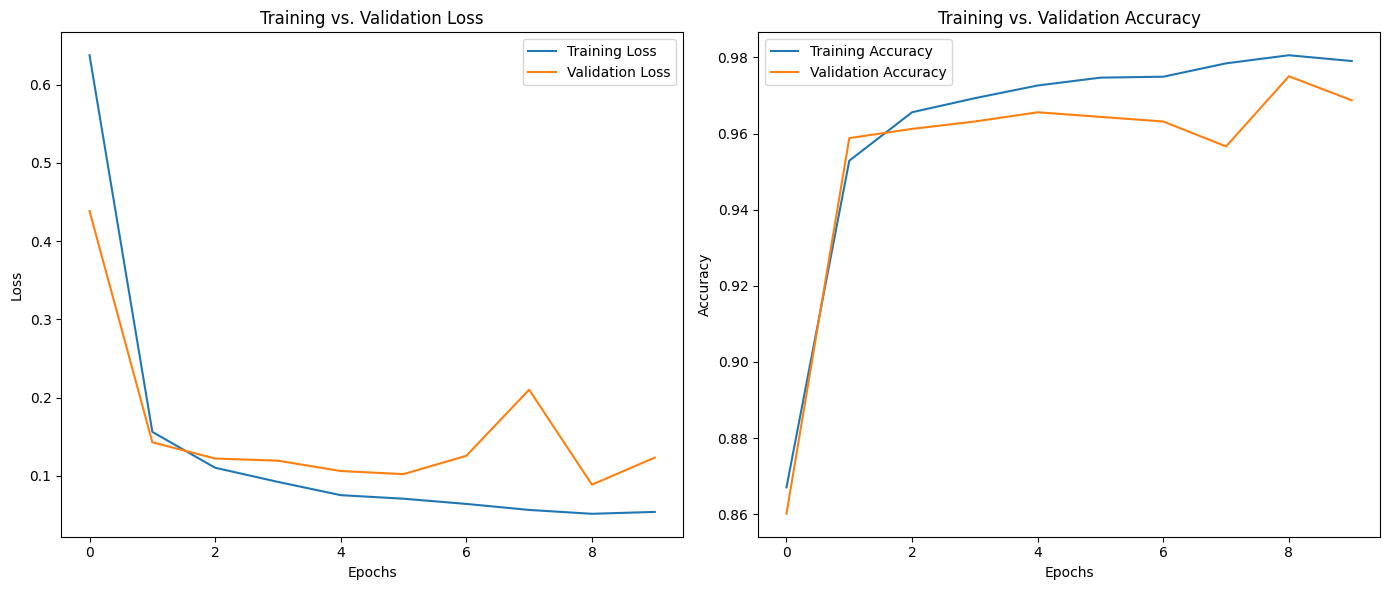

In [ ]:
# Extract loss values from the history object
trans_training_loss = history1.history['loss']
trans_validation_loss = history1.history['val_loss']

# Extract accuracy values from the history object
trans_training_accuracy = history1.history['accuracy']
trans_validation_accuracy = history1.history['val_accuracy']

# Plotting the training loss vs. validation loss
plt.figure(figsize=(14, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(trans_training_loss, label='Training Loss')
plt.plot(trans_validation_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(trans_training_accuracy, label='Training Accuracy')
plt.plot(trans_validation_accuracy, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# Model Evaluation

In [ ]:
# Evaluate on the test dataset using Custom Model
custom_test_loss, custom_test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {custom_test_loss}")
print(f"Test Accuracy: {custom_test_accuracy}")

645/645 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9583 - loss: 0.1300
Test Loss: 0.13233500719070435
Test Accuracy: 0.9585999846458435


In [ ]:
# Evaluate on the test dataset using Transfer Learning Model
trans_test_loss, trans_test_accuracy = trans_model.evaluate(test_ds)
print(f"Test Loss: {trans_test_loss}")
print(f"Test Accuracy: {trans_test_accuracy}")

645/645 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.9790 - loss: 0.0641
Test Loss: 0.06878297030925751
Test Accuracy: 0.9768276214599609


From the above we can see that the performance of VGG16 model is better so I will use the VGG16 model further for prediction.

### Classification Report of VGG16 Model

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_pred = []
y_true = []

for images, labels in test_ds:
    preds = trans_model.predict(images, verbose=False)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Generate report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.82      0.80       573
           1       0.99      1.00      1.00       573
           2       0.99      1.00      1.00       573
           3       0.99      1.00      1.00       573
           4       1.00      1.00      1.00       573
           5       1.00      1.00      1.00       573
           6       0.98      1.00      0.99       573
           7       1.00      1.00      1.00       573
           8       1.00      1.00      1.00       573
           9       1.00      1.00      1.00       573
          10       1.00      1.00      1.00       573
          11       0.99      1.00      0.99       573
          12       0.99      1.00      1.00       573
          13       1.00      1.00      1.00       573
          14       0.99      1.00      0.99       573
          15       1.00      0.99      0.99       573
          16       1.00      0.98      0.99       573
          17       0.99    

### OCR Prediction

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Prepocess Image Function
This function basically converts the RGM image to Grayscale image and perform binary thresholding and Dilation operation for further prediction.

In [ ]:
def read_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def show_image(img, label=None) -> None:
    plt.imshow(img, cmap='gray')
    plt.axis(False)
    plt.title(label)
    plt.show()

In [ ]:
def convert_2_gray(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray_image

In [ ]:
def binarization(image):
    img, thresh = cv2.threshold(image, 0,255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
    return img, thresh

In [ ]:
import cv2

def dilate(image, words=False):
    img = image.copy()
    kernel_size = (1, 3) if not words else (6, 6)
    iterations = 4 if not words else 3

    # Create the structuring element
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    # Perform dilation
    dilation = cv2.dilate(img, rect_kernel, iterations=iterations)
    return dilation


In [ ]:
def find_rect(image):
    contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    rects = []

    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)  # Extract the bounding rectangle coordinates of each countour
        rects.append([x,y,w,h])

    sorted_rects = list(sorted(rects, key=lambda x: x[0])) # Sorting the rects from Left-to-Right
    return sorted_rects

### Detect Text Regions
This function returns the cordinates of the text present in the image.

### Prediction
This function predicts the text when an image region is passed.

In [ ]:
class_labels = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',  # Digits
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', # Uppercase letters
    'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'
]


def decode_prediction(pred):
    # The model outputs a softmax probability over classes
    char_index = np.argmax(pred, axis=1)  # Get the index of the maximum probability
    char = class_labels[char_index[0]]  # Convert index to character using a mapping
    return char

In [ ]:
def extract(image):
    chars = []              # a list to store recognized characters

    image_cpy = image.copy()
    _, bin_img = binarization(convert_2_gray(image_cpy))
    full_dil_img = dilate(bin_img,words=True)
    words = find_rect(full_dil_img)                       # Recognized words within the image
    del _, bin_img, full_dil_img                          # for better memory usage

    for word in words:
        x,y,w,h = word                                    # coordinates of the word
        img = image_cpy[y:y+h, x:x+w]

        _, bin_img = binarization(convert_2_gray(img))
        dil_img = dilate(bin_img)
        char_parts = find_rect(dil_img)                     # Recognized chars withtin the word
        cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0), 3) # draw a green rectangle around the word

        del _, bin_img, dil_img

        for char in char_parts:
            x,y,w,h = char
            ch = img[y:y+h, x:x+w]

            gray = cv2.resize(ch, (150,150), interpolation=cv2.INTER_CUBIC)
            gray = gray.astype(np.int32)

            predicted = decode_prediction(trans_model.predict(np.array([gray]), verbose=-1))
            chars.append(predicted)                            # append the character into the list
            #show_image(ch)

            del ch
        chars.append(' ')  # at the end of each iteration (end of word) append a space

    show_image(image)
    return ''.join(chars[:-1])

### Bounding Box
This function draws the bounding box around the words present in the Image.

In [ ]:
!pip install opencv-python-headless

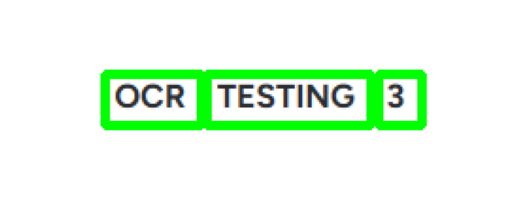

--> OCR TESTING 3


In [ ]:
# Testing 1
img = read_image('/content/testing3.png')
text = extract(img)
print('-->',text)

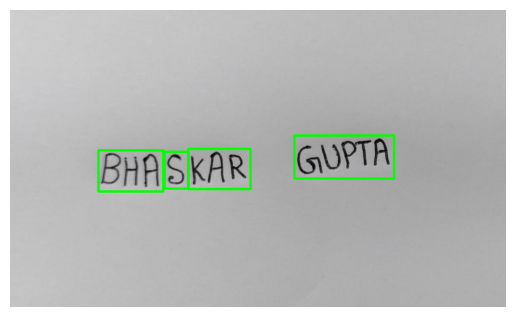

--> BHA S KAR GVTA


In [ ]:
# Testing 1
img1 = read_image('/content/testing_name.jpg')
text1 = extract(img1)
print('-->',text1)

#Conclusion
This project successfully demonstrated the development of an Optical Character Recognition (OCR) system using Convolutional Neural Networks (CNNs) and Transfer Learning. The primary goal was to build a model capable of accurately recognizing and classifying characters in images. Here are some key takeaways from the project:

1. Dataset and Model Development:
The project utilized the "Standard OCR Dataset," providing a diverse set of characters for training and testing the OCR model.
Two approaches were employed: a custom CNN model and a transfer learning model using the pre-trained VGG16 architecture.
The custom CNN model was constructed with layers such as Conv2D, MaxPooling2D, Flatten, and Dense, designed to extract image features and classify characters.
Transfer learning leveraged the knowledge learned by VGG16 on the ImageNet dataset to improve accuracy and efficiency.
2. Performance Evaluation and Comparison:
Both models were evaluated using metrics like loss and accuracy.
The visualization of training history showed how the models learned over epochs, and validation metrics helped assess generalization performance.
Ultimately, the VGG16-based model outperformed the custom CNN model, demonstrating the effectiveness of transfer learning in this context.
A classification report further detailed the performance of the VGG16 model on the test set.
3. Real-world Application:
The project showcased a real-world application using the trained OCR model for text detection and recognition in an image.
This demonstration highlighted the potential of the model in applications like document digitization, text extraction, and automation.
4. Challenges and Potential Improvements:
While the project achieved promising results, it is important to consider potential limitations.
The model's performance might be impacted by factors such as noise, image quality, and font variations.
Further improvements could involve exploring different CNN architectures, hyperparameter optimization, data augmentation techniques, or integrating language models to enhance word-level recognition.
5. Overall Significance:
This project contributes to the field of OCR by demonstrating the effective use of deep learning methods.
The successful development and evaluation of the OCR system suggest its potential for automating text extraction from various sources.
The project provides a foundation for future development and research in this domain.